In [ ]:
import pandas as pd

seeds_data = pd.read_csv('seeds.csv', sep=';')
seeds_data.head()


,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,871.0000,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,905.0000,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
seeds_data.fillna(seeds_data.mean(), inplace=True)
seeds_data.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,871.0000,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,905.0000,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
# Calculate IQR for each feature
Q1 = seeds_data.quantile(0.25)
Q3 = seeds_data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to replace outliers with the median value of the feature
def replace_outliers_with_median(df, feature):
    median = df[feature].median()
    iqr = IQR[feature]
    q1 = Q1[feature]
    q3 = Q3[feature]

    # Replace with median if the value is outside 1.5 times the IQR from the Q1 or Q3
    df[feature] = df[feature].apply(lambda x: median if x < q1 - 1.5 * iqr or x > q3 + 1.5 * iqr else x)
    return df

# Apply the function to each feature in the DataFrame
for feature in seeds_data.columns:
    seeds_data = replace_outliers_with_median(seeds_data, feature)


In [ ]:
seeds_data.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8781,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.8781,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the data
seeds_scaled = scaler.fit_transform(seeds_data)

# Convert the scaled data back to a DataFrame (optional, for better handling and visualization)
seeds_scaled_df = pd.DataFrame(seeds_scaled, columns=seeds_data.columns)


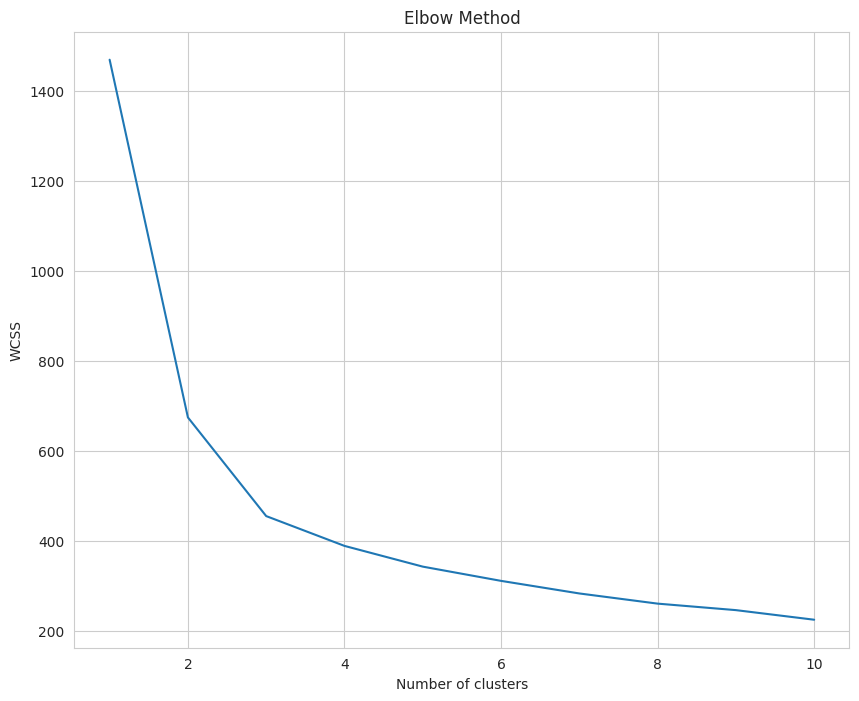

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(seeds_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the results on a line graph to observe the 'elbow'
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


In [ ]:
# Fit the K-Means model with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(seeds_scaled_df)

# Predict the cluster labels
labels = kmeans.labels_

# Add the cluster labels back to your original dataframe for further analysis
seeds_data['Cluster'] = labels

# To inspect the size of each cluster
print(seeds_data['Cluster'].value_counts())

# Calculate the centroids for each cluster
centroids = kmeans.cluster_centers_

# Convert centroids to a DataFrame for better interpretation
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=seeds_data.columns[:-1])  # excluding the Cluster column


Cluster
2    76
1    67
0    67
Name: count, dtype: int64


In [ ]:
# Calculate the centroids for each cluster
centroids = kmeans.cluster_centers_

# Convert centroids to a DataFrame for better interpretation
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=seeds_data.columns[:-1])  # excluding the Cluster column
centroids_df


,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,11.825672,13.237761,0.849231,5.230701,2.841164,4.630866,5.115366
1,18.495373,16.203433,0.884101,6.175687,3.697537,3.632373,6.041701
2,14.295658,14.274868,0.880701,5.502553,3.251282,2.831036,5.151916


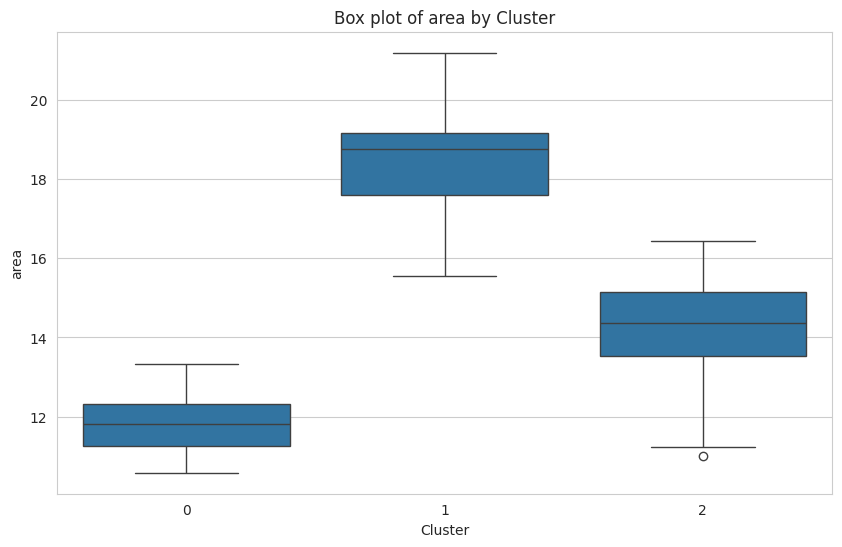

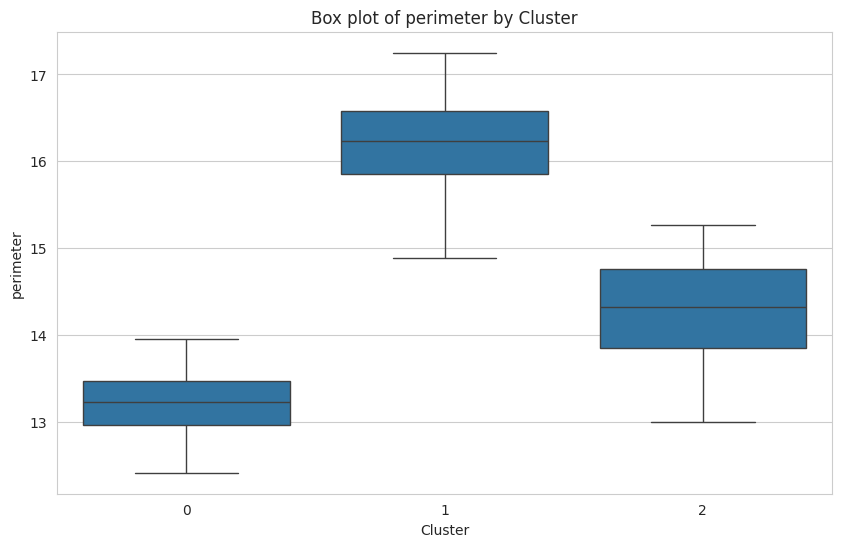

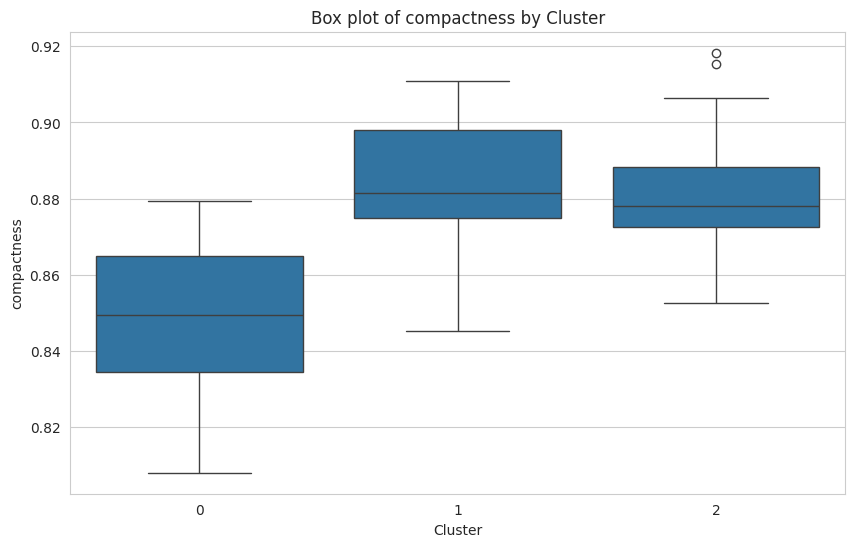

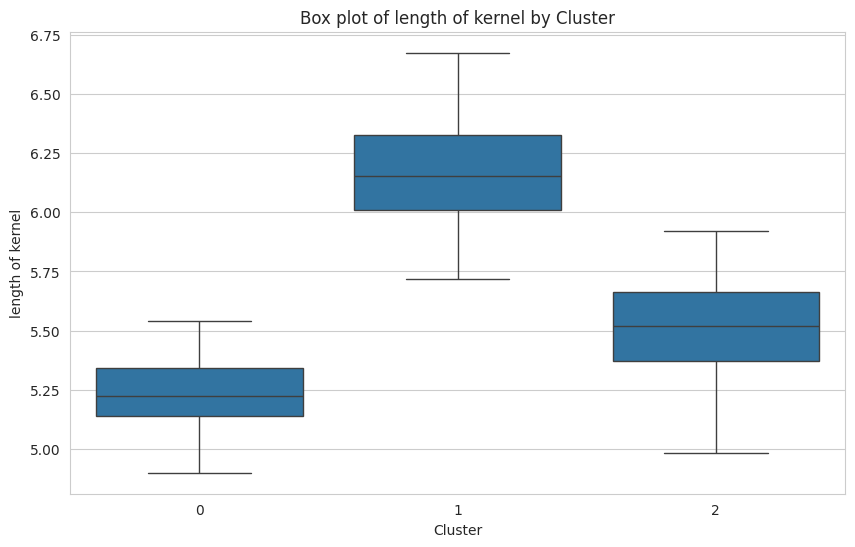

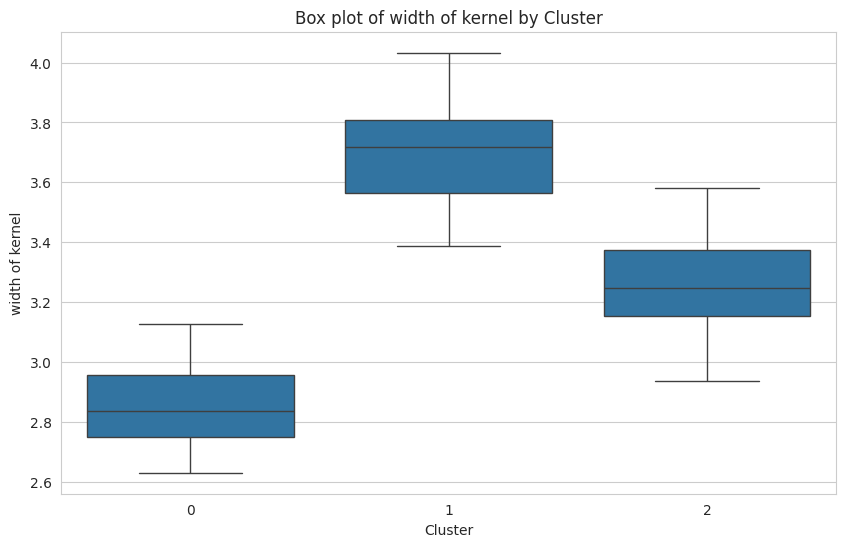

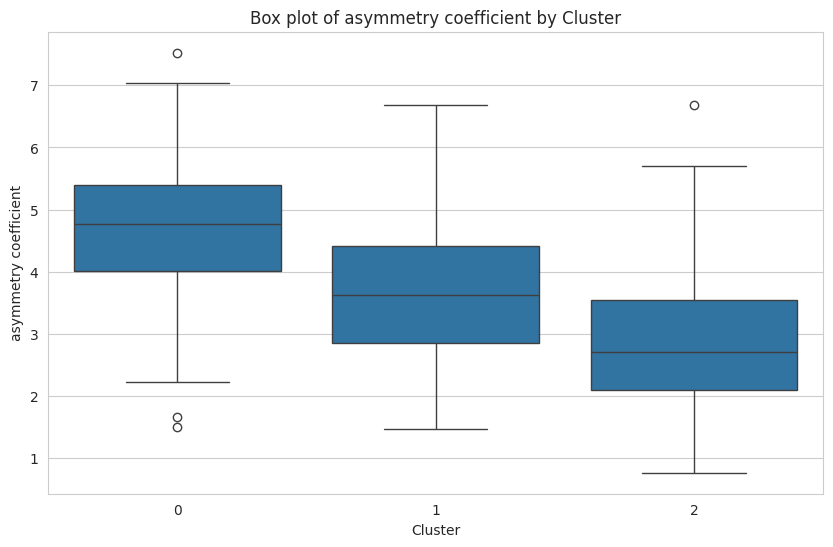

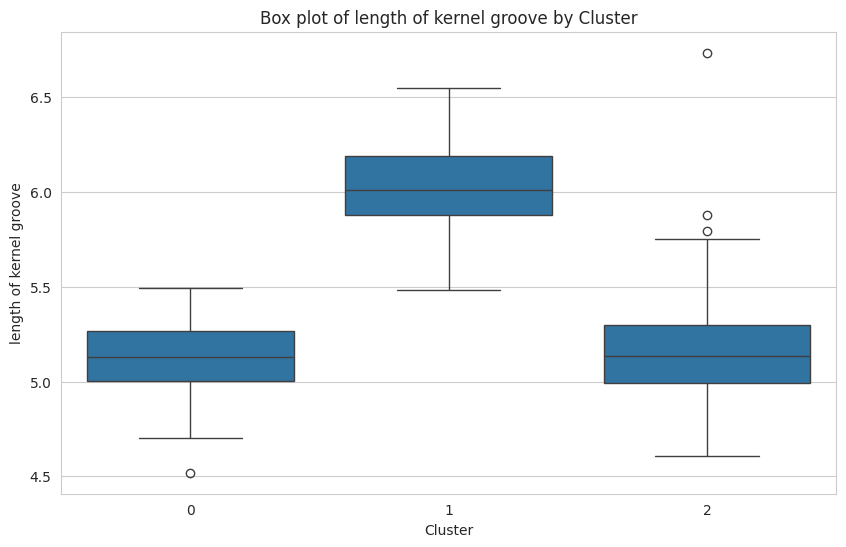

In [ ]:
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# For each feature, create a box plot
for feature in seeds_data.columns[:-1]:  # Exclude the 'Cluster' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=seeds_data)
    plt.title(f'Box plot of {feature} by Cluster')
    plt.show()


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


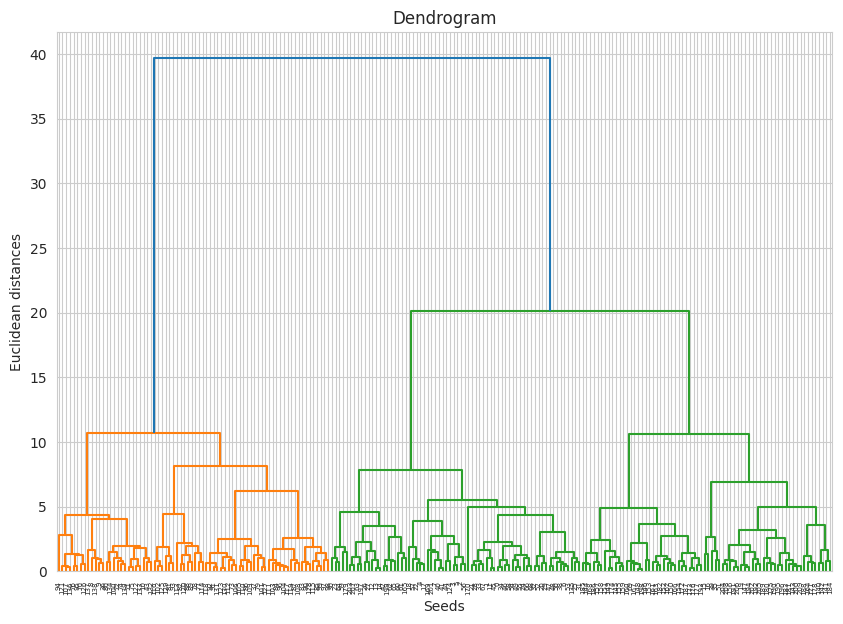

In [ ]:
# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(seeds_scaled_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Seeds')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
# Create an instance of AgglomerativeClustering with the appropriate number of clusters
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
# Fit model and predict clusters
cluster_labels = cluster.fit_predict(seeds_scaled_df)

# Adding cluster labels to your data for further analysis
seeds_data['Cluster_Hierarchical'] = cluster_labels


Cluster_Hierarchical
0    74
2    68
1    68
Name: count, dtype: int64


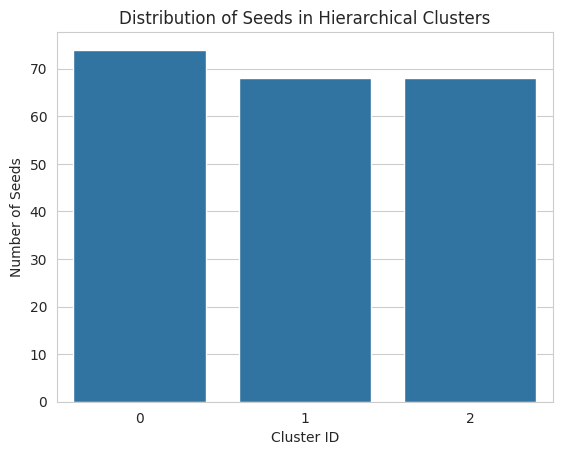

In [ ]:
import seaborn as sns

# Display the count of seeds in each cluster
cluster_counts = seeds_data['Cluster_Hierarchical'].value_counts()
print(cluster_counts)

# Visualize the distribution of clusters
sns.countplot(x='Cluster_Hierarchical', data=seeds_data)
plt.title('Distribution of Seeds in Hierarchical Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Seeds')
plt.show()


In [ ]:
# Calculate centroids for each cluster
cluster_centroids = seeds_data.groupby('Cluster_Hierarchical').mean()
print(cluster_centroids)


                           area  perimeter  compactness  length of kernel  \
Cluster_Hierarchical                                                        
0                     18.231622  16.094865     0.882911          6.144703   
1                     12.060441  13.333676     0.852206          5.251324   
2                     13.951912  14.113824     0.879135          5.450353   

                      width of kernel  asymmetry coefficient  \
Cluster_Hierarchical                                           
0                            3.663878               3.611378   
1                            2.874021               4.846206   
2                            3.215147               2.529584   

                      length of kernel groove   Cluster  
Cluster_Hierarchical                                     
0                                    6.001649  1.094595  
1                                    5.115706  0.147059  
2                                    5.104105  1.882353  


In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(seeds_scaled_df)

# Adding the PCA results to your data for visualization
seeds_data['PCA1'] = pca_result[:, 0]
seeds_data['PCA2'] = pca_result[:, 1]


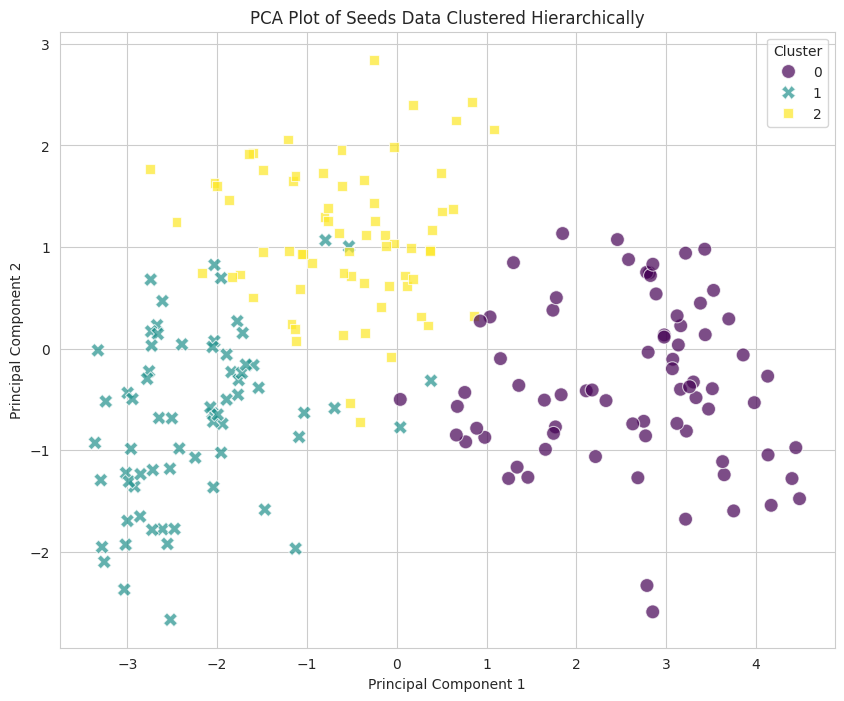

In [ ]:
import seaborn as sns

# Create a scatter plot of the two PCA components and color by hierarchical cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Hierarchical', palette='viridis', data=seeds_data, s=100, alpha=0.7, style='Cluster_Hierarchical')
plt.title('PCA Plot of Seeds Data Clustered Hierarchically')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scalam datele pentru a asigura o bună performanță a DBSCAN, care este sensibil la scara caracteristicilor
scaler = StandardScaler()
seeds_scaled = scaler.fit_transform(seeds_data.iloc[:, :-1])  # Exclude ultima coloană dacă este eticheta clusterului


In [ ]:
# Inițializăm DBSCAN
# eps este distanța maximă între două eșantioane pentru ca acestea să fie considerate în același vecinătate
# min_samples este numărul minim de eșantioane într-un vecinătate pentru ca un punct să fie considerat un punct central
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Aplicăm DBSCAN pe datele scalate
clusters = dbscan.fit_predict(seeds_scaled)

# Adăugăm etichetele clusterului înapoi la setul de date pentru vizualizare
seeds_data['DBSCAN_Cluster'] = clusters


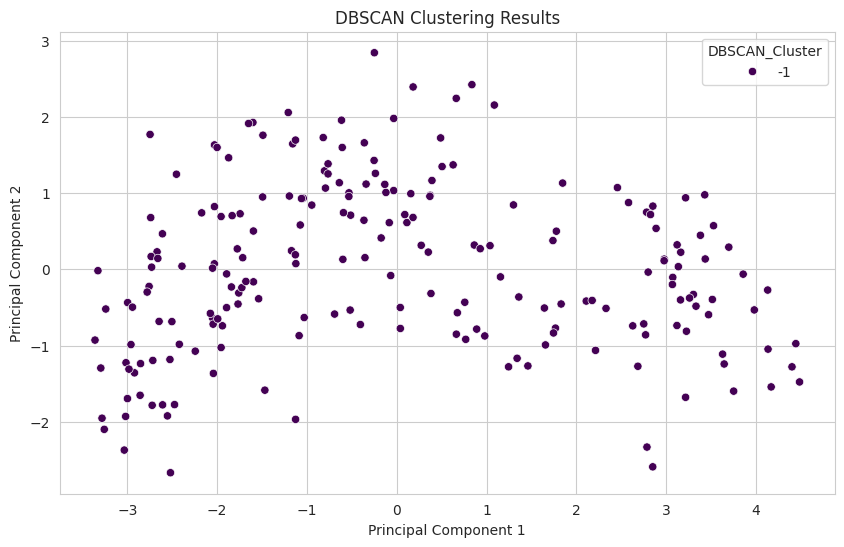

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vizualizăm rezultatele clusterizării
plt.figure(figsize=(10, 6))
sns.scatterplot(x=seeds_data['PCA1'], y=seeds_data['PCA2'], hue=seeds_data['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


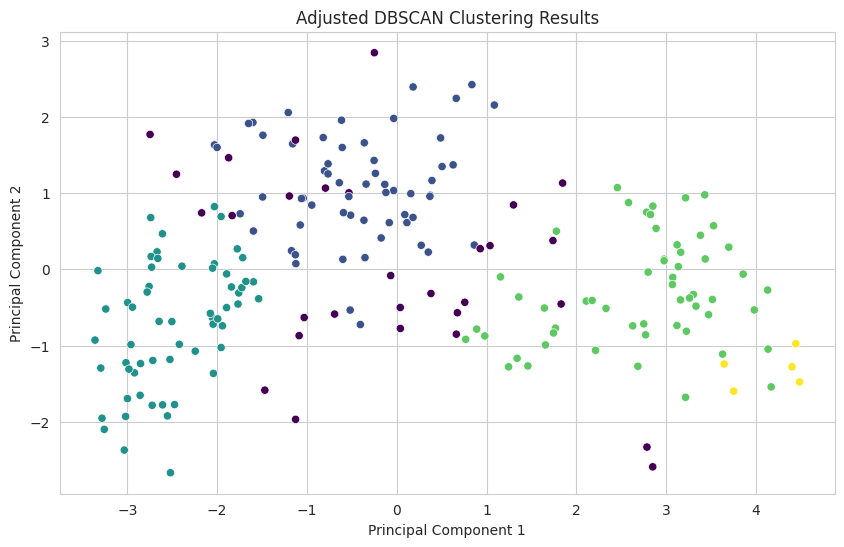

In [ ]:
# Ajustăm parametrii DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=4)  # eps mărit și min_samples redus
clusters = dbscan.fit_predict(seeds_scaled)

# Adăugăm etichetele clusterului înapoi la setul de date pentru vizualizare
seeds_data['DBSCAN_Cluster'] = clusters

# Vizualizăm rezultatele clusterizării
plt.figure(figsize=(10, 6))
sns.scatterplot(x=seeds_data['PCA1'], y=seeds_data['PCA2'], hue=seeds_data['DBSCAN_Cluster'], palette='viridis', legend=None)
plt.title('Adjusted DBSCAN Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
import pickle

# Save the trained K-means model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
